In [1]:
## Imports

# Third-party packags
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

# Third-party packages for plotting
from matplotlib.widgets import Slider, Button, RadioButtons
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
## Load trajectory (using real data here as an example)

ds_CTD_659 = xr.load_dataset('CTD_659.nc')

In [3]:
## Downsample to speed up plotting/improve lagging

nptime = ds_CTD_659.time.data[0:-1:10]
nplat = ds_CTD_659.latitude.data[0:-1:10]
npdep = ds_CTD_659.pressure.data[0:-1:10]
nplon = ds_CTD_659.longitude.data[0:-1:10]

In [4]:
## Datetime 
ts = pd.to_datetime(nptime) 
d = list(ts.strftime('%Y-%m-%d'))

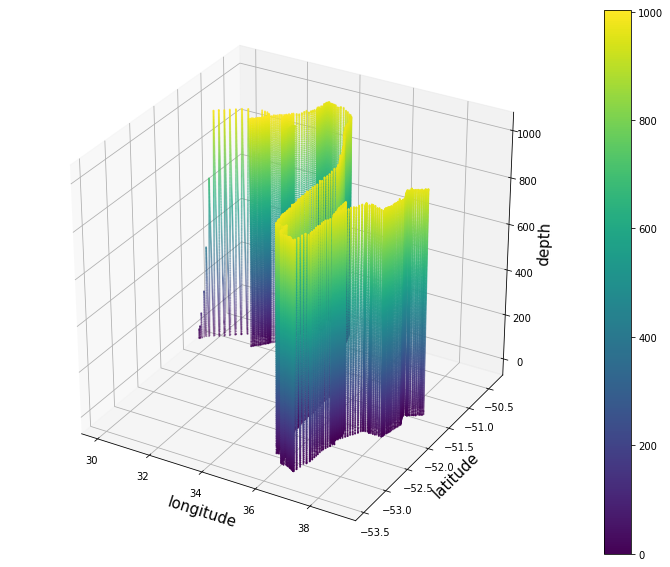

In [5]:
## Plot trajectory

traj = np.array(list(zip(nplon, nplat, npdep)))

fig = plt.figure(figsize=(15, 12))
ax = plt.axes(projection='3d')
fig.subplots_adjust(left=0.25, bottom=0.25)

ax.set_xlabel('longitude', fontsize=15, rotation=150)
ax.set_ylabel('latitude',fontsize=15)
ax.set_zlabel('depth', fontsize=15, rotation=60)

p = ax.scatter3D(nplon, nplat, npdep, c=npdep, s=0.75)
fig.colorbar(p)

In [6]:
## Date range selection (downsampling data for visualization) #takes like 15 seconds but it works
start_date = ts[0] 
end_date = ts[-1]
dates = pd.date_range(start_date, end_date)

options = [(date.strftime('%d %b %Y'), date) for date in dates]
index = (0, len(options)-1)

selection_range_slider = widgets.SelectionRangeSlider(
    options=options,
    index=index,
    description='Dates',
    orientation='horizontal',
    layout={'width': '700px'})

def gui():
    def myupdate(control1):
        start = control1[0].date(); end = control1[1].date()
        mini = str(start); maxi = str(end)
        index_min = d.index(mini); index_max = d.index(maxi)
        fig = plt.figure(figsize=(10, 10))
        ax = plt.axes(projection='3d')
        ax.axes.set_xlim3d(left=28.0, right=40.0) 
        ax.axes.set_ylim3d(bottom=-54.0, top=-50.0) 
        ax.axes.set_zlim3d(bottom=0, top=1000) 
        ax.scatter3D(nplon[index_min:index_max], nplat[index_min:index_max], npdep[index_min:index_max], c=npdep[index_min:index_max],s=0.75)
        ax.set_xlabel('longitude', fontsize=15, rotation=150)
        ax.set_ylabel('latitude',fontsize=15)
        ax.set_zlabel('depth', fontsize=15, rotation=60)
    return myupdate

widgets.interactive(gui(), control1 = selection_range_slider)

interactive(children=(SelectionRangeSlider(description='Dates', index=(0, 86), layout=Layout(width='700px'), o…

In [7]:
## A dot that moves along the trajectory through time controlled by a slider *works but is slow
slider = widgets.IntSlider(
    value=0,
    min=0,max=len(ts),
    step=1,
    description='Step:', disabled=False, continuous_update=False,
    orientation='horizontal', readout=True, readout_format='d', layout={'width': '700px'})

# # dot slider

def gui():
    def myupdate(control1):
        idx = control1
        fig = plt.figure(figsize=(10, 10))
        ax = plt.axes(projection='3d')
        ax.axes.set_xlim3d(left=28.0, right=40.0) 
        ax.axes.set_ylim3d(bottom=-54.0, top=-50.0) 
        ax.axes.set_zlim3d(bottom=0, top=1000) 
        ax.scatter3D(nplon, nplat, npdep, c=npdep, s=0.75,alpha=0.3)
        ax.scatter3D(nplon[idx], nplat[idx], npdep[idx], c='red',s=20)
        ax.set_xlabel('longitude', fontsize=15, rotation=150)
        ax.set_ylabel('latitude',fontsize=15)
        ax.set_zlabel('depth', fontsize=15, rotation=60)
    return myupdate

widgets.interactive(gui(), control1 = slider)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Step:', layout=Layout(width='70…

In [8]:
play = widgets.Play(value=0,min=0,max=len(ts),step=1,interval=200,description="Press play", disabled=False,layout={'width': '400'})
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider]) 
#woud show the dot trajectory better. Don't know how to make the plot with this yet...

In [ ]:
## Rotation
